# Analyzing Trends in Video Games on Steam (((((((WIP))))))))
by Sean Ha

# Introduction (((((WIP))))))))
The video games industry is larger than it has ever been, with a global market value of over \\$100 billion. In 2021, it is expected to reach approximately \\$140 billion. There are various devices through which these games are distributed, including computers, game consoles, and smartphones. For each of these devices, there usually exist various storefronts through which games are sold. Examples of this include the Apple App Store for Apple devices, the Google Play Store for Android devices, the PlayStation Store for PlayStation consoles, and Steam for PCs. While there exist many other storefronts for PCs, we will be focusing our analysis on Steam, as it is currently the largest PC digital distributor for games.

Developing video games takes lots of time and money. If we could analyze data of existing games, we could perhaps reach conclusions about what types of games would be the most successful, or profitable, and minimize the chances of developing a game that will not sell particularly well. If you were a game designer or a manager at a game studio, you very well might be interested in this sort of data.

In recent times, through technological advancements and innovations, the barrier of entry for making a game has been drastically lowered. As a result, there has been a surge of "indie" game developers (usually classified by a small development team, that does not have the financial support of a large game publisher). These indie game developers are usually short on cash, and are relying on the success of their project to stay afloat. This type of data might be very useful to these kinds of people, as it could help them make an informed decision about what type of game to develop, and specific factors to think about, as opposed to taking a shot in the dark.

# Setup ((WIP))))))))))))))))
Below are the libraries that we will be needing for this project. These will help us store and analyze our data.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data
We are using a CSV file that contains the dataset. The dataset and a description of what it contains can be found here: https://data.world/craigkelly/steam-game-data. Please take a look at that page to understand what particular columns in the dataset might represent, and where the data came from.

We will load the dataset into a Pandas DataFrame. A DataFrame is a 2 dimensional data structure, similar to something like an SQL table. It will help us in organizing and analyzing our data.

In [2]:
df = pd.read_csv("games-features.csv")
df.head()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,...,,,English French German Korean,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


We will also load a second, related dataset that contains information regarding playtime and purchases of games by users on Steam. The dataset can be found here: https://www.kaggle.com/tamber/steam-video-games

In [3]:
play_df = pd.read_csv("steam-pp-data.csv", header=None, names=['UserID', 'GameName', 'Type', 'Hours', '0'])

# Drop pointless columns of User ID's and all 0's
play_df = play_df.drop(['UserID', '0'], axis=1)

play_df.head()

,GameName,Type,Hours
0,The Elder Scrolls V Skyrim,purchase,1.0
1,The Elder Scrolls V Skyrim,play,273.0
2,Fallout 4,purchase,1.0
3,Fallout 4,play,87.0
4,Spore,purchase,1.0


# Tidy Data



We will drop the unnecessary columns that we will not need in this project. For us, that includes the following:

- DemoCount
- DeveloperCount
- DLCCount
- MovieCount
- PackageCount
- PublisherCount
- AchievementHighlightedCount
- PriceCurrency
- PriceFinal
- SupportEmail
- SupportURL
- AboutText
- Background
- ShortDescrip
- DetailedDescrip
- DRMNotice
- ExtUserAcctNotice
- HeaderImage
- LegalNotice
- Reviews
- Website
- PCMinReqsText
- PCRecReqsText
- LinuxMinReqsText
- LinuxRecReqsText
- MacMinReqsText
- MacRecReqsText

We will remove these columns in particular because they generally contain information that is either meaningless to analyze, or simply not relevant to this project.

In [4]:
df = df.drop(['DemoCount', 'DeveloperCount', 'DLCCount', 'MovieCount', 'PackageCount', 'PublisherCount', 
              'AchievementHighlightedCount', 'PriceCurrency', 'PriceFinal', 'SupportEmail', 'SupportURL', 'AboutText', 
              'Background', 'ShortDescrip', 'DetailedDescrip', 'DRMNotice','ExtUserAcctNotice', 'HeaderImage', 
              'LegalNotice', 'Reviews', 'Website', 'PCMinReqsText', 'PCRecReqsText', 'LinuxMinReqsText', 
              'LinuxRecReqsText', 'MacMinReqsText', 'MacRecReqsText'], axis=1)
df.head()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,...,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,SupportedLanguages
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,88,68991,13,13033334,...,False,False,False,False,False,False,False,False,9.99,English French German Italian Spanish Simplifi...
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,2439,5,5399140,...,False,False,False,False,False,False,False,False,4.99,English French German Italian Spanish
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,79,2319,5,7621102,...,False,False,False,False,False,False,False,False,4.99,English French German Italian Spanish
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,888,4,7498965,...,False,False,False,False,False,False,False,False,4.99,English French German Italian Spanish
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,2934,5,5399499,...,False,False,False,False,False,False,False,False,4.99,English French German Korean


Let's rename one of the columns so that it is more clear what the column is describing.

In [5]:
df = df.rename(columns={'PriceInitial': 'Price'})

Now let's clean up the "SupportedLanguages" column. Currently, some observations contain unnecessary information in that column. What we what to extract is the number of languages that a particular game supports. In addition, we will want to take a look at some major languages, and see what impact they might have on the success of a game. We could hypothetically perform this on every single language, but since there are so many, we will limit our analysis to a few major ones. If you are interested in a particular language that I do not include, feel free to try it out yourself and see what kind of results you get!

What we will do is split this column up into some new ones. One for the number of languages the game supports ("LangSupportedCount"). And then additional columns for whether or not a particular game supports a particular language (e.g. a column named "SupportsEnglish" would contain 1 if the game support English, and 0 if it does not).

This will separate different data from one column into multiple columns, making it easier for analysis in the future. We want multiple columns to contain specific information, as opposed to having one column with a large amount of information.

For this project, here are the languages that we will create specific columns for:
- English
- French
- Spanish
- Japanese
- Chinese (1 if game supports traditional, simplified, or both; 0 if neither)
- Korean

In [6]:
# Create column for number of languages support
df['LangSupportCount'] = 0

# Create columns for the specific languages specified above
df['SupportsEnglish'] = 0
df['SupportsFrench'] = 0
df['SupportsSpanish'] = 0
df['SupportsJapanese'] = 0
df['SupportsChinese'] = 0
df['SupportsKorean'] = 0

for index, row in df.iterrows():
    # Remove unnecessary data (asterisks, the string "languages with full audio support")
    langs = df.iloc[index].SupportedLanguages
    df.loc[index, 'SupportedLanguages'] = langs.replace('*', '')
    langs = df.iloc[index].SupportedLanguages
    df.loc[index, 'SupportedLanguages'] = langs.replace('languages with full audio support', '')
    
    # Put value for number of languages supported
    lang_list = df.iloc[index].SupportedLanguages.split()
    df.loc[index, 'LangSupportCount'] = len(lang_list)
    
    # Converts languages to all uppercase for case insensitivity
    lang_list = [lang.upper() for lang in lang_list]
    
    # Put values for whether or not game supports each language
    if 'ENGLISH' in lang_list:
        df.loc[index, 'SupportsEnglish'] = 1
    if 'FRENCH' in lang_list:
        df.loc[index, 'SupportsFrench'] = 1
    if 'SPANISH' in lang_list:
        df.loc[index, 'SupportsSpanish'] = 1
    if 'JAPANESE' in lang_list:
        df.loc[index, 'SupportsJapanese'] = 1
    if 'TRADITIONAL CHINESE' in lang_list or 'SIMPLIFIED CHINESE' in lang_list:
        df.loc[index, 'SupportsChinese'] = 1
    if 'KOREAN' in lang_list:
        df.loc[index, 'SupportsKorean'] = 1
        
# Drop the now unnecessary "SupportedLanguages" column
df = df.drop(['SupportedLanguages'], axis=1)

Next, we will convert the boolean columns into integer columns. So in other words, True becomes 1, and False becomes 0.  This will allow us to perform operations on these columns that can only be done on numerical values.

In [7]:
# Converts true into 1, false into 0
for col in df.columns:
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)

It turns out that certain columns and rows may have data that is not good to work with. In particular, the table contains observations for not only the games themselves, but also for their DLCs (additional downloadable content). We want to remove these observations, as they are essentially causing repeat rows. 

In addition, there appear to be repeated observations without any identifiable cause. One example is the following:

In [8]:
# Find all observations with a ResponseName of 'Portal 2'
df[df['ResponseName'] == 'Portal 2']

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,...,GenreIsRacing,GenreIsMassivelyMultiplayer,Price,LangSupportCount,SupportsEnglish,SupportsFrench,SupportsSpanish,SupportsJapanese,SupportsChinese,SupportsKorean
24,620,620,Portal 2,Portal 2,Apr 18 2011,0,95,73128,12,8741499,...,0,0,19.99,24,1,1,1,1,0,1
26,620,620,Portal 2,Portal 2,Apr 18 2011,0,95,73128,12,8741499,...,0,0,19.99,24,1,1,1,1,0,1
928,659,620,Portal 2 - Pre-order,Portal 2,Apr 18 2011,0,95,73144,12,0,...,0,0,19.99,24,1,1,1,1,0,1


Here we can see that the game 'Portal 2' is listed 3 times, with the same values in all 3 observations. Next, I will show how I will remove these observations from the table.

The QueryID corresponds to the QueryName, and the ResponseID corresponds to the ResponseName. In theory, QueryID should always equal ResponseID and QueryName should always equal ResponseName. However, this is not always the case, as we can see in the aboev example. This can clearly cause issues when operating on this data. 

We know a row must have an invalid observation if it turns out that the QueryID does not equal the ResponseID (invalid meaning that the Query and Response are not exactly the same). In addition, each QueryID should only appear once throughout the entire table. Similarly, each ResponseID should only appear once as well. Then, we can remove any repeated rows defined by these conditions. We will consider the first instance of each QueryID and ResponseID to be the valid observation, with any future duplicates being considered "invalid" observations, which are removed. This is fine, because as mentioned earlier, we are only removing duplicate rows that will skew our data.

In [9]:
# Removes all entries where QueryID != ResponseID
df = df[df['QueryID'] == df['ResponseID']]
# Removes entries with duplicate QueryID or ResponseID's
df = df.drop_duplicates(subset='QueryID')
df = df.drop_duplicates(subset='ResponseID')

Now we will remove the unnecessary columns that we no longer need. The columns to be removed are listed below:

- QueryID
- ResponseID
- QueryName

Then we will also rename ResponseName to GameName to better describe the data it contains.

In [10]:
df = df.drop(['QueryID', 'ResponseID', 'QueryName'], axis=1)
df = df.rename(columns={'ResponseName': 'GameName'})

One thing to note is that the ReleaseDate column has no clear format. In fact, it appears as if any sort of string can appear in this column. If we just take a look at the first few rows, it looks like there is a clear format. However, there are many observations that do not follow this format even slightly, making it very difficult to work with. For example, some values include 'Nov 1 2000', which is the standard format, but other values can include: 'Feb 2011', 'Coming Soon', 'TBA', 'Fall 2016', and even some extraordinary ones like 'The League of Evil is preparing its evil plans...'. Therefore, it is very difficult to get this data into a standardized form, with such variation in data.

My solution is to scan each ReleaseDate string for a year value (any 4 digit number starting with 19 or 20). Then we will create a new column called 'ReleaseYear' that will contain this value. We will ignore the month and day. Any rows that do not have a year value with become NaN. This is a relatively easy solution to implement that is able to extract the meaningful data from the ReleaseDate column, even with all of the variation. In addition, the year value is arguably the most important part of the ReleaseDate, and it is a number that most ReleaseDate strings include, even if they do not include a month or day.

We will use regular expressions to locate the year.

In [11]:
df['ReleaseYear'] = np.nan

for index, row in df.iterrows():
    match = re.search("(19|20)\d\d", row.ReleaseDate)
    # No match is found
    if match is None:
        df.loc[index, 'ReleaseYear'] = np.nan
    # Match is found
    else:
        df.loc[index, 'ReleaseYear'] = int(match.group())

Looks good! We will remove the now unnecessary ReleaseDate column, and move the ReleaseYear column to be the 2nd column in the DataFrame. In addition, we will move the Price column to the third column, for readability.

In [19]:
cols = df.columns.tolist()
cols = [cols[0]] + cols[-1:] + [cols[-9:][0]] + cols[1:-9] + cols[-8:-1]
df = df[cols]
df = df.drop(['ReleaseDate'], axis=1)

In [20]:
df.head()

,GameName,ReleaseYear,Price,RequiredAge,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,...,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,LangSupportCount,SupportsEnglish,SupportsFrench,SupportsSpanish,SupportsJapanese,SupportsChinese,SupportsKorean
0,Counter-Strike,2000.0,9.99,0,88,68991,13,13033334,92789,9140731,...,0,0,0,10,1,1,1,0,0,1
1,Team Fortress Classic,1999.0,4.99,0,0,2439,5,5399140,60368,753627,...,0,0,0,5,1,1,1,0,0,0
2,Day of Defeat,2003.0,4.99,0,79,2319,5,7621102,71499,1709740,...,0,0,0,5,1,1,1,0,0,0
3,Deathmatch Classic,2001.0,4.99,0,0,888,4,7498965,70936,789676,...,0,0,0,5,1,1,1,0,0,0
4,Half-Life: Opposing Force,1999.0,4.99,0,0,2934,5,5399499,60370,705741,...,0,0,0,4,1,1,0,0,0,1


# Missing Data
In many instances, your data might contain missing values. You will have to decide how you want to handle such missing data. We will check this dataset to see if there are any missing values.

In [21]:
# Find number of empty values in all columns
missing_count_df = pd.DataFrame(df.isna().sum(),columns=["Missing Values"])
missing_count_df[(missing_count_df.T != 0).any()]

,Missing Values
ReleaseYear,248


Luckily in our case, we can see that we do not have any data that is missing, excluding the values that we purposefully set to NaN in ReleaseYear.

The Metacritic column contains a value which is the "score" that Metacritic gives the game, on a scale from 0 to 100, 100 being the best. An important note to make is that a value of 0 in the Metacritic column should be considered a missing value, as it means that Metacritic does not have a score for the game. Theoretically, it could also mean that the game was given a 0 score, but Metacritic has never given out a score of 0 to a game. As a result, we will convert all zeroes in the Metacritic column to NaN values, so that these missing values do not skew our data.

In [22]:
# All zeroes in Metacritic column get turned into NaN
for index, row in df.iterrows():
    if row.Metacritic == 0:
        df.loc[index, 'Metacritic'] = np.nan

Now let's check our other dataset for any missing values.

In [23]:
# Find number of empty values in all columns
missing_count_play_df = pd.DataFrame(play_df.isna().sum(),columns=["Missing Values"])
missing_count_play_df[(missing_count_play_df.T != 0).any()]

,Missing Values


Great, there are no missing values in this dataset either!

Now we will merge the two datasets so that it is all in one centralized DataFrame. First, we need to be able to match a column in one DataFrame with a column in another. We will do this by game name. To make sure subtle differences in game names are ignored, we will standardize each game name. We will do this by making all game names uppercase, removing and special characters they might contain, and removing all spaces between words. In addition, some names might contain the substring "(r)" or "(tm)" which also should be removed. Let's do it.

In [24]:
# Changes all GameNames to uppercase in df

# Changes all GameNames to uppercase
df['GameName'] = df['GameName'].str.upper()

pattern = re.compile('[\W_]+')

for index, row in df.iterrows():
    # Removes all (R) and (TM) in GameName
    df.loc[index, 'GameName'].replace('(r)', '')
    df.loc[index, 'GameName'].replace('(tm)', '')
    
    df.loc[index, 'GameName'] = pattern.sub('', row.GameName)

In [25]:
# Standardizes GameNames for play_df

# Changes all GameNames to uppercase
play_df['GameName'] = play_df['GameName'].str.upper()

pattern = re.compile('[\W_]+')

# Create dictionary for old name -> standardized name
d = {game_name: pattern.sub('', game_name) for game_name in play_df.GameName.unique()}

# Remove all non-alphanumeric characters
play_df['GameName'] = play_df['GameName'].replace(d)

Now the GameNames should be the same across both tables for any two games which are the same between the tables.

So now we will combine all the data from play_df into columns in df. We will calulate the total number of purchases for each game by summing up the total number of 'purchase' type rows in play_df. Then we will calculate the total playtime for each game by summing up the total hours for all 'play' type rows. We will also create a column which is total playtime / number of purchases to obtain the average number of hours played by a person who bought the game.

In [26]:
# Dictionary to contain key=GameName, value=total number of purchasers
purchase_dict = {}
# Dictionary to contain key=GameName, value=total number of hours played
playtime_dict = {}

for index, row in play_df.iterrows():
    if row.Type == 'purchase':
        curr = purchase_dict.setdefault(row.GameName, 0)
        purchase_dict[row.GameName] = curr + 1
    else:
        curr = playtime_dict.setdefault(row.GameName, 0)
        playtime_dict[row.GameName] = curr + row.Hours

In [27]:
# Create new columns
df['TotalBuyers'] = 0
df['TotalPlaytime'] = 0

indices = df.index

# Add values to TotalBuyers col
for key in purchase_dict:
    # Get index of row corresponding to this GameName
    i = indices[df['GameName'] == key]
    # If the game is in the DataFrame
    if not i.empty:
        df.loc[i[0], 'TotalBuyers'] = purchase_dict[key]

In [28]:
# Add values to TotalPlaytime col
for key in playtime_dict:
    # Get index of row corresponding to this GameName
    i = indices[df['GameName'] == key]
    # If the game is in the DataFrame
    if not i.empty:
        df.loc[i[0], 'TotalPlaytime'] = playtime_dict[key]

In [29]:
df.head()

,GameName,ReleaseYear,Price,RequiredAge,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,...,GenreIsMassivelyMultiplayer,LangSupportCount,SupportsEnglish,SupportsFrench,SupportsSpanish,SupportsJapanese,SupportsChinese,SupportsKorean,TotalBuyers,TotalPlaytime
0,COUNTERSTRIKE,2000.0,9.99,0,88.0,68991,13,13033334,92789,9140731,...,0,10,1,1,1,0,0,1,856,134261.1
1,TEAMFORTRESSCLASSIC,1999.0,4.99,0,NaN,2439,5,5399140,60368,753627,...,0,5,1,1,1,0,0,0,366,22.7
2,DAYOFDEFEAT,2003.0,4.99,0,79.0,2319,5,7621102,71499,1709740,...,0,5,1,1,1,0,0,0,534,1351.5
3,DEATHMATCHCLASSIC,2001.0,4.99,0,NaN,888,4,7498965,70936,789676,...,0,5,1,1,1,0,0,0,524,23.7
4,HALFLIFEOPPOSINGFORCE,1999.0,4.99,0,NaN,2934,5,5399499,60370,705741,...,0,4,1,1,0,0,0,1,366,171.4


Now we have successfully merged the data from play_df into one DataFrame, df. Note that as the number of buyers increases, the playtime will naturally increase. We want to see the average playtime of a typical player, regardless of how popular a game is. We will find this by taking TotalPlaytime / TotalBuyers. We will create a new column to store this value for each row. Let's call this new column 'AveragePlaytime'.

In [30]:
df['AveragePlaytime'] = df['TotalPlaytime'] / df['TotalBuyers']
df.head()

,GameName,ReleaseYear,Price,RequiredAge,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,...,LangSupportCount,SupportsEnglish,SupportsFrench,SupportsSpanish,SupportsJapanese,SupportsChinese,SupportsKorean,TotalBuyers,TotalPlaytime,AveragePlaytime
0,COUNTERSTRIKE,2000.0,9.99,0,88.0,68991,13,13033334,92789,9140731,...,10,1,1,1,0,0,1,856,134261.1,156.847079
1,TEAMFORTRESSCLASSIC,1999.0,4.99,0,NaN,2439,5,5399140,60368,753627,...,5,1,1,1,0,0,0,366,22.7,0.062022
2,DAYOFDEFEAT,2003.0,4.99,0,79.0,2319,5,7621102,71499,1709740,...,5,1,1,1,0,0,0,534,1351.5,2.530899
3,DEATHMATCHCLASSIC,2001.0,4.99,0,NaN,888,4,7498965,70936,789676,...,5,1,1,1,0,0,0,524,23.7,0.045229
4,HALFLIFEOPPOSINGFORCE,1999.0,4.99,0,NaN,2934,5,5399499,60370,705741,...,4,1,1,0,0,0,1,366,171.4,0.468306


Note that this operation makes AveragePlaytime NaN if the value of the denominator 'TotalBuyers' equals zero. This is actually what we want, as this means we are missing data for that particular game.

With this, we have finished tidying our data. We can move on to the next step.

# EDA
EDA, or Exploratory Data Analysis is the process of displaying the data in different forms to analyze trends and form hypotheses.

We will create a correlation matrix to get a general overview of how our data might be correlated. A correlation matrix displays the correlation coefficients of pairs of variables in the data. Since we have a lot of columns, I will take a subset of this data to create a correlation matrix. We will only take the variables which I think would be interesting to see.

We will calculate the Pearson correlation coefficient, since these variables that we will analyze are all continuous.

In [43]:
# Columns to calculate correlation coefficient of
corr_cols = ['ReleaseYear', 'Price', 'Metacritic', 'RecommendationCount', 'ScreenshotCount', 'SteamSpyOwners', 
             'SteamSpyPlayersEstimate', 'AchievementCount', 'LangSupportCount', 'TotalBuyers', 'AveragePlaytime']
corr_df = df[corr_cols]

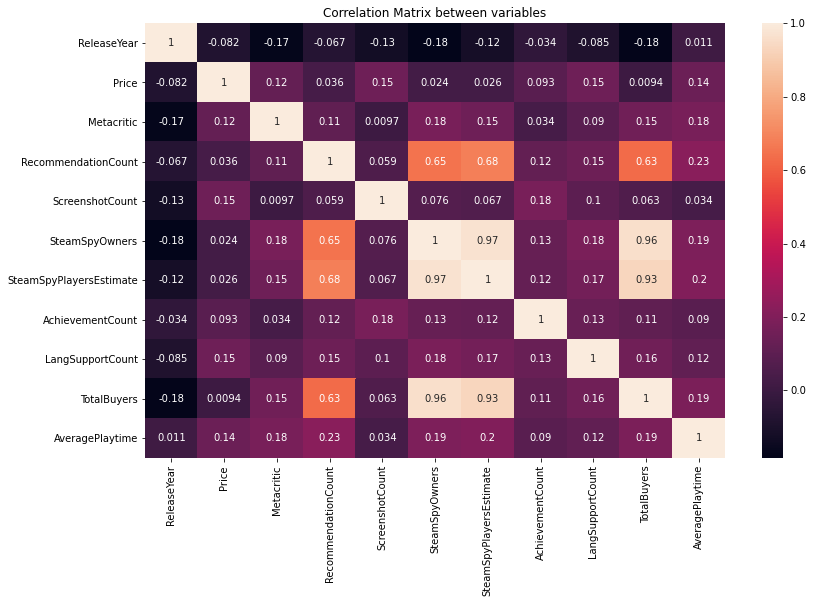

In [44]:
# Create correlation matrix
corr_matrix = corr_df.corr()

plt.subplots(figsize = (13,8))
hm = sns.heatmap(corr_matrix, annot=True)
hm.set_title('Correlation Matrix between variables')
plt.show()

Looking at this correlation matrix, there do not seem to be any outstanding results. It is generally what we would expect. The RecommendationCount naturally increases as the number of player (SteamSpyPlayersEstimate) increases. And of course TotalBuyers and SteamSpyOwners are heavily correlated as well, since they are essentially measuring the same thing.

However, this does raise a good point. We care more about the percentage of the playerbase that recommends a game as opposed to the total number of recommendations it received. Therefore, very popular games would not be heavily skewed by having naturally having tons of recommendations, since they have tons of players. Let's make this change. In addition, since TotalBuyers and SteamSpyOwners are essentially measuring the same thing, we will remove the TotalBuyers column and use the SteamSpyOwners column to represent the number of owners of each game.

In [38]:
# Remove TotalBuyers column
df.drop(['TotalBuyers'], axis=1)
;

''

In [39]:
# Create new column 'StandardizedRec'
df['StandardizedRec'] = df['RecommendationCount'] / df['SteamSpyPlayersEstimate']

In [45]:
df.head()

,GameName,ReleaseYear,Price,RequiredAge,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,...,SupportsEnglish,SupportsFrench,SupportsSpanish,SupportsJapanese,SupportsChinese,SupportsKorean,TotalBuyers,TotalPlaytime,AveragePlaytime,StandardizedRec
0,COUNTERSTRIKE,2000.0,9.99,0,88.0,68991,13,13033334,92789,9140731,...,1,1,1,0,0,1,856,134261.1,156.847079,0.007548
1,TEAMFORTRESSCLASSIC,1999.0,4.99,0,NaN,2439,5,5399140,60368,753627,...,1,1,1,0,0,0,366,22.7,0.062022,0.003236
2,DAYOFDEFEAT,2003.0,4.99,0,79.0,2319,5,7621102,71499,1709740,...,1,1,1,0,0,0,534,1351.5,2.530899,0.001356
3,DEATHMATCHCLASSIC,2001.0,4.99,0,NaN,888,4,7498965,70936,789676,...,1,1,1,0,0,0,524,23.7,0.045229,0.001125
4,HALFLIFEOPPOSINGFORCE,1999.0,4.99,0,NaN,2934,5,5399499,60370,705741,...,1,1,0,0,0,1,366,171.4,0.468306,0.004157


Alright, there are ton of possible things to look for in this dataset. What I will be focusing on for the rest of this project is the factors that influence a "successful" game. I will define a "successful" game as one that has a high Metacritic score. It is very possible that you might consider other factors for a "success," such as a high number of players, a high average playtime, or a high amount of recommendations per player. But for this project, I will consider just the Metacritic score, and how various factors can influence it.

TODO: Plot metacritic by year

In [15]:
df

,GameName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,RecommendationCount,...,GenreIsRacing,GenreIsMassivelyMultiplayer,Price,LangSupportCount,SupportsEnglish,SupportsFrench,SupportsSpanish,SupportsJapanese,SupportsChinese,SupportsKorean
0,Counter-Strike,Nov 1 2000,0,0,1,0,88.0,0,1,68991,...,0,0,9.99,10,1,1,1,0,0,1
1,Team Fortress Classic,Apr 1 1999,0,0,1,0,NaN,0,1,2439,...,0,0,4.99,5,1,1,1,0,0,0
2,Day of Defeat,May 1 2003,0,0,1,0,79.0,0,1,2319,...,0,0,4.99,5,1,1,1,0,0,0
3,Deathmatch Classic,Jun 1 2001,0,0,1,0,NaN,0,1,888,...,0,0,4.99,5,1,1,1,0,0,0
4,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,NaN,0,1,2934,...,0,0,4.99,4,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13352,Baseball Riot,Jan 17 2017,0,0,1,0,NaN,1,0,0,...,0,0,0.00,1,1,0,0,0,0,0
13353,Passage 4,Dec 13 2016,0,0,1,0,NaN,1,0,0,...,0,0,0.00,6,1,1,1,0,0,0
13354,Piximalism,Sep 26 2019,0,0,1,0,NaN,1,0,0,...,0,0,0.00,1,1,0,0,0,0,0
13355,Technoball,Dec 12 2016,0,0,1,0,NaN,1,0,0,...,0,0,0.00,1,1,0,0,0,0,0


In [11]:
df.MovieCount.unique()

array([ 0,  2,  3,  5,  1,  7, 16,  6,  4, 17,  8, 11,  9, 10, 12, 13, 14,
       20, 18])

In [100]:
df

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,LangSupportCount,SupportsEnglish,SupportsFrench,SupportsSpanish,SupportsJapanese,SupportsChinese,SupportsKorean
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88.0,...,0,9.99,9.99,10,1,1,1,0,0,1
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,NaN,...,0,4.99,4.99,5,1,1,1,0,0,0
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79.0,...,0,4.99,4.99,5,1,1,1,0,0,0
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,NaN,...,0,4.99,4.99,5,1,1,1,0,0,0
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,NaN,...,0,4.99,4.99,4,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13352,567660,567660,Baseball Riot,Baseball Riot,Jan 17 2017,0,0,1,0,NaN,...,0,0.00,0.00,1,1,0,0,0,0,0
13353,567860,567860,Passage 4,Passage 4,Dec 13 2016,0,0,1,0,NaN,...,0,0.00,0.00,6,1,1,1,0,0,0
13354,567940,567940,Piximalism,Piximalism,Sep 26 2019,0,0,1,0,NaN,...,0,0.00,0.00,1,1,0,0,0,0,0
13355,568150,568150,Technoball,Technoball,Dec 12 2016,0,0,1,0,NaN,...,0,0.00,0.00,1,1,0,0,0,0,0


In [30]:
est = df[(df['SteamSpyPlayersEstimate'] == 0)]
est[~np.isnan(est['Metacritic'])]

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,LangSupportCount,SupportsEnglish,SupportsFrench,SupportsSpanish,SupportsJapanese,SupportsChinese,SupportsKorean
171,4780,4780,Medieval II: Total War Kingdoms,Medieval II: Total War(tm) Kingdoms,Nov 27 2007,0,0,3,0,85.0,...,0,11.99,11.99,1,1,0,0,0,0,0
513,18430,18430,Crazy Machines 1.5,Crazy Machines 1.5,Dec 12 2008,0,0,1,0,78.0,...,0,9.99,9.99,1,1,0,0,0,0,0
639,25808,25808,Europa Universalis III: Divine Wind,Europa Universalis III: Divine Wind,Jan 21 2011,0,0,1,0,71.0,...,0,9.99,9.99,2,1,0,0,0,0,0
670,29540,29540,Guild Wars: Game of the Year Edition,Guild Wars(r) Game of the Year Edition,Apr 22 2009,0,0,1,0,89.0,...,1,19.99,19.99,9,1,1,1,1,0,1
671,29560,29560,Guild Wars: Factions,Guild Wars Factions(r),Apr 22 2009,0,0,1,0,84.0,...,1,19.99,19.99,9,1,1,1,1,0,1
673,29580,29580,Guild Wars: Nightfall,Guild Wars Nightfall(r),Apr 22 2009,0,0,1,0,84.0,...,1,19.99,19.99,9,1,1,1,1,0,1
674,29700,29700,Guild Wars: Eye of the North,Guild Wars: Eye of the North(r),Oct 8 2010,0,0,1,0,79.0,...,1,19.99,19.99,9,1,1,1,1,0,1
928,659,620,Portal 2 - Pre-order,Portal 2,Apr 18 2011,0,0,1,1,95.0,...,0,19.99,19.99,24,1,1,1,1,0,1
936,4932,4920,Natural Selection 2 - Deluxe DLC,Natural Selection 2,Oct 30 2012,0,0,1,5,80.0,...,0,9.99,9.99,10,1,1,1,0,0,0
937,6129,6120,Shank pre-order,Shank,Oct 25 2010,17,1,1,0,67.0,...,0,9.99,9.99,1,1,0,0,0,0,0


In [33]:
temp = df.drop_duplicates(subset='ResponseID')

In [34]:
temp

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,LangSupportCount,SupportsEnglish,SupportsFrench,SupportsSpanish,SupportsJapanese,SupportsChinese,SupportsKorean
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88.0,...,0,9.99,9.99,10,1,1,1,0,0,1
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,NaN,...,0,4.99,4.99,5,1,1,1,0,0,0
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79.0,...,0,4.99,4.99,5,1,1,1,0,0,0
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,NaN,...,0,4.99,4.99,5,1,1,1,0,0,0
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,NaN,...,0,4.99,4.99,4,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13352,567660,567660,Baseball Riot,Baseball Riot,Jan 17 2017,0,0,1,0,NaN,...,0,0.00,0.00,1,1,0,0,0,0,0
13353,567860,567860,Passage 4,Passage 4,Dec 13 2016,0,0,1,0,NaN,...,0,0.00,0.00,6,1,1,1,0,0,0
13354,567940,567940,Piximalism,Piximalism,Sep 26 2019,0,0,1,0,NaN,...,0,0.00,0.00,1,1,0,0,0,0,0
13355,568150,568150,Technoball,Technoball,Dec 12 2016,0,0,1,0,NaN,...,0,0.00,0.00,1,1,0,0,0,0,0


In [35]:
df[df['QueryID'] != df['ResponseID']]

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,LangSupportCount,SupportsEnglish,SupportsFrench,SupportsSpanish,SupportsJapanese,SupportsChinese,SupportsKorean
927,100,80,Counter-Strike: Condition Zero Deleted Scenes,Counter-Strike: Condition Zero,Mar 1 2004,0,0,1,0,65.0,...,0,9.99,9.99,10,1,1,1,0,0,1
928,659,620,Portal 2 - Pre-order,Portal 2,Apr 18 2011,0,0,1,1,95.0,...,0,19.99,19.99,24,1,1,1,1,0,1
929,1309,1300,SiN Multiplayer,SiN Episodes: Emergence,May 10 2006,0,0,1,0,75.0,...,0,9.99,9.99,3,1,1,0,0,0,0
930,1313,1300,SiN,SiN Episodes: Emergence,May 10 2006,0,0,1,0,75.0,...,0,9.99,9.99,3,1,1,0,0,0,0
931,2130,2100,Dark Messiah of Might & Magic Multi-Player,Dark Messiah of Might & Magic,Oct 25 2006,17,1,1,0,72.0,...,0,9.99,9.99,5,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8101,413730,329790,Goultard,Krosmaster Arena,Nov 9 2015,0,0,1,7,NaN,...,0,0.00,0.00,7,1,1,1,1,0,0
10287,488821,359550,Rainbow Six Siege - Pro League Ash Set,Tom Clancys Rainbow Six(r) Siege,Dec 1 2015,17,0,1,24,NaN,...,0,49.99,49.99,14,1,1,1,1,0,1
10288,488822,359550,Rainbow Six Siege - Pro League Thermite Set,Tom Clancys Rainbow Six(r) Siege,Dec 1 2015,17,0,1,24,NaN,...,0,49.99,49.99,14,1,1,1,1,0,1
10289,488823,359550,Rainbow Six Siege - Pro League Bandit Set,Tom Clancys Rainbow Six(r) Siege,Dec 1 2015,17,0,1,24,NaN,...,0,49.99,49.99,14,1,1,1,1,0,1


In [31]:
df[df['ResponseID'] == 2100]

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal,SupportedLanguages
49,2100,2100,Dark Messiah of Might & Magic Single Player,Dark Messiah of Might & Magic,Oct 25 2006,17,1,1,0,72,...,True,False,False,False,False,False,False,9.99,9.99,English French German Italian Spanish


In [84]:
df.columns.unique()

Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'G

In [98]:
0 in df.SteamSpyPlayersEstimate.unique()

True